# DEEP LEARNING : Practical session 1  

NOTE: the models were trained without using a random seed so recompiling the notebook might result in slightly different results but the models leaderboard stays the same.

## I-Presenting the dataset:

https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [ ]:
%%capture


!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets


# variable information
print(concrete_compressive_strength.variables)


                            name     role        type demographic description  \
0                         Cement  Feature  Continuous        None        None   
1             Blast Furnace Slag  Feature     Integer        None        None   
2                        Fly Ash  Feature  Continuous        None        None   
3                          Water  Feature  Continuous        None        None   
4               Superplasticizer  Feature  Continuous        None        None   
5               Coarse Aggregate  Feature  Continuous        None        None   
6                 Fine Aggregate  Feature  Continuous        None        None   
7                            Age  Feature     Integer        None        None   
8  Concrete compressive strength   Target  Continuous        None        None   

    units missing_values  
0  kg/m^3             no  
1  kg/m^3             no  
2  kg/m^3             no  
3  kg/m^3             no  
4  kg/m^3             no  
5  kg/m^3             no  


The **Concrete Compressive Strength Dataset** is used to predict the compressive strength of concrete based on its ingredients and age. This dataset, essential for civil engineering applications, contains **1030 instances** and **8 input features**, all of which are numerical. This simplifies the preprocessing since there are no categorical variables, and thus, no need for one-hot encoding.

### Input Variables (Features):
- **Cement (kg/m³)**: Amount of cement in the mix.
- **Blast Furnace Slag (kg/m³)**: Used as a partial replacement for cement.
- **Fly Ash (kg/m³)**: Another partial replacement for cement.
- **Water (kg/m³)**: Necessary for hydration, but too much weakens the concrete.
- **Superplasticizer (kg/m³)**: Improves workability.
- **Coarse Aggregate (kg/m³)**: Gravel or crushed stone in the mix.
- **Fine Aggregate (kg/m³)**: Sand in the mix.
- **Age (days)**: The number of days the concrete has cured.

### Target Variable:
- **Compressive Strength (MPa)**: The target variable measuring the strength of the concrete.

This dataset is clean, with no missing values, so there is no need for Mean/Median Imputation, and it is well-suited for regression tasks where the goal is to predict the continuous target variable, **compressive strength**, based on the input features.

# II-EDA:

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Combine features and target into a single DataFrame for easy summarization
data = pd.concat([X, y], axis=1)

# Calculate summary statistics including max, min, and quartiles
summary = data.describe()

# Display the summary
print(summary)


            Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.

### 1 - Scatter Plotting Target vs Each Variable (to look for any familiar trends )

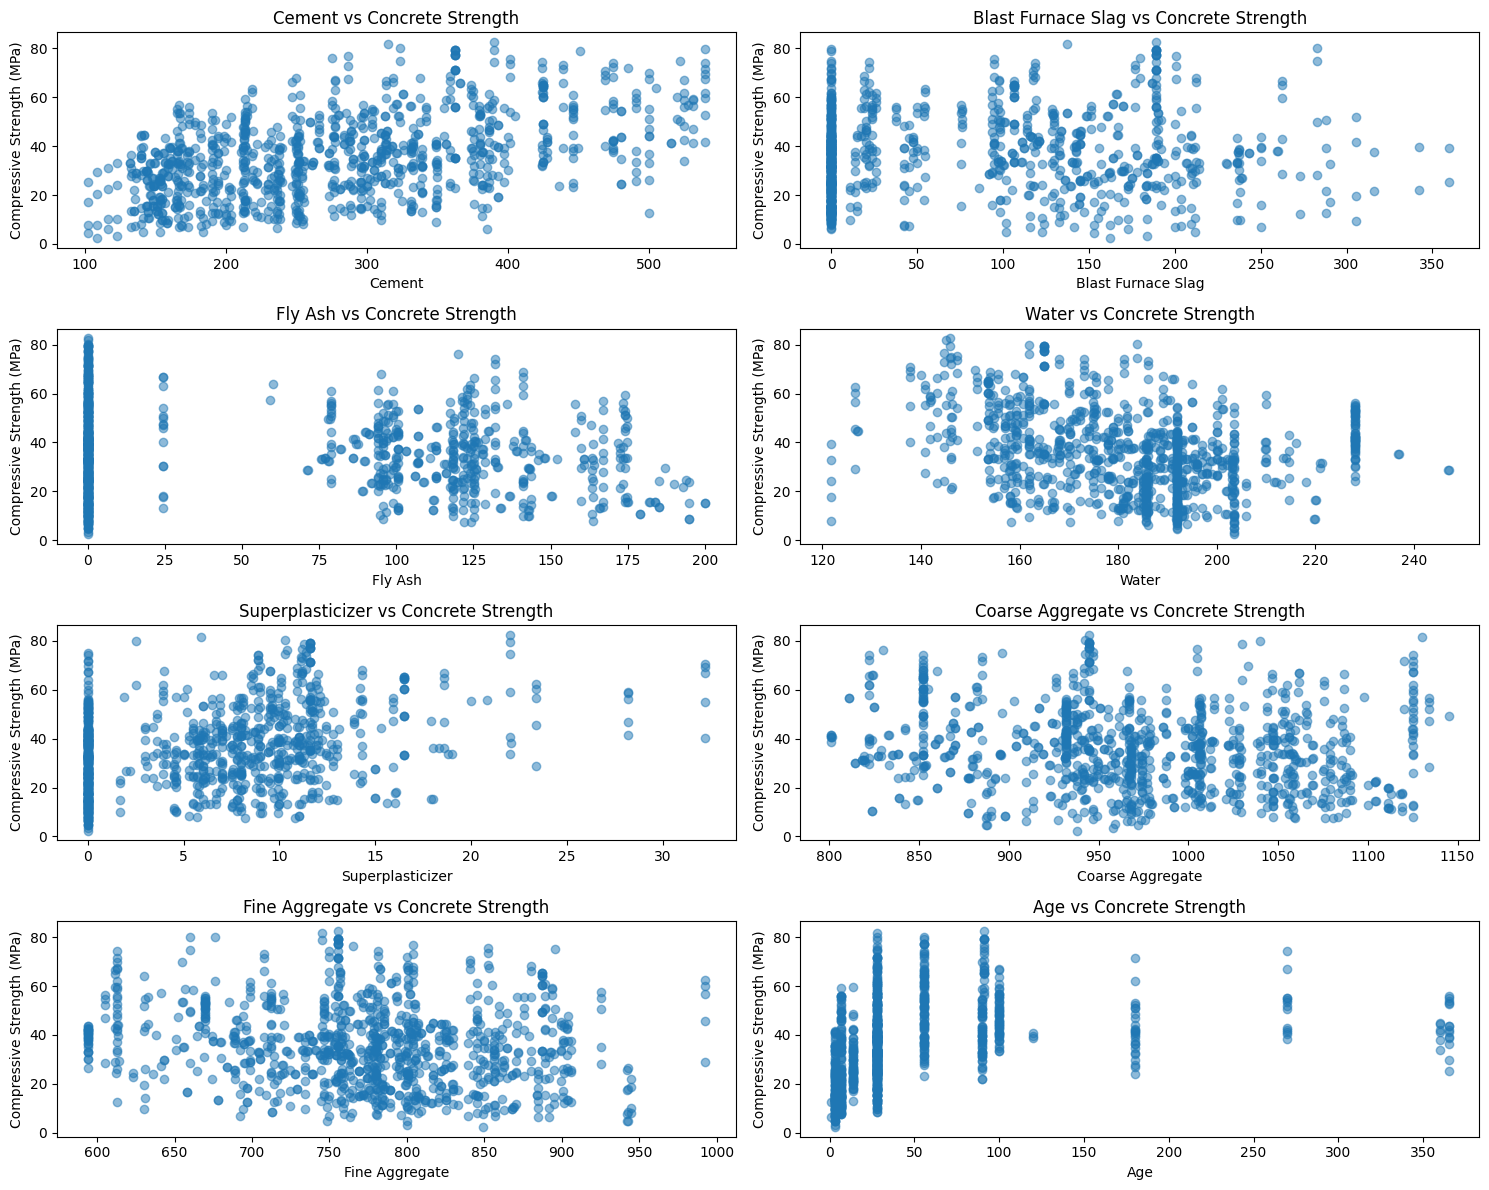

In [ ]:
import matplotlib.pyplot as plt

# Set up a figure and axes for an 8-plot grid (4 by 2)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Scatter plot of each feature vs the target
for i, column in enumerate(X.columns):
    axes[i].scatter(X[column], y, alpha=0.5)
    axes[i].set_title(f'{column} vs Concrete Strength')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Compressive Strength (MPa)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Some features, like Cement, show a clearer positive correlation with compressive strength, while others, like Fly Ash and Water, do not display a strong linear relationship.

### 2- Plot a Correlation Matrix

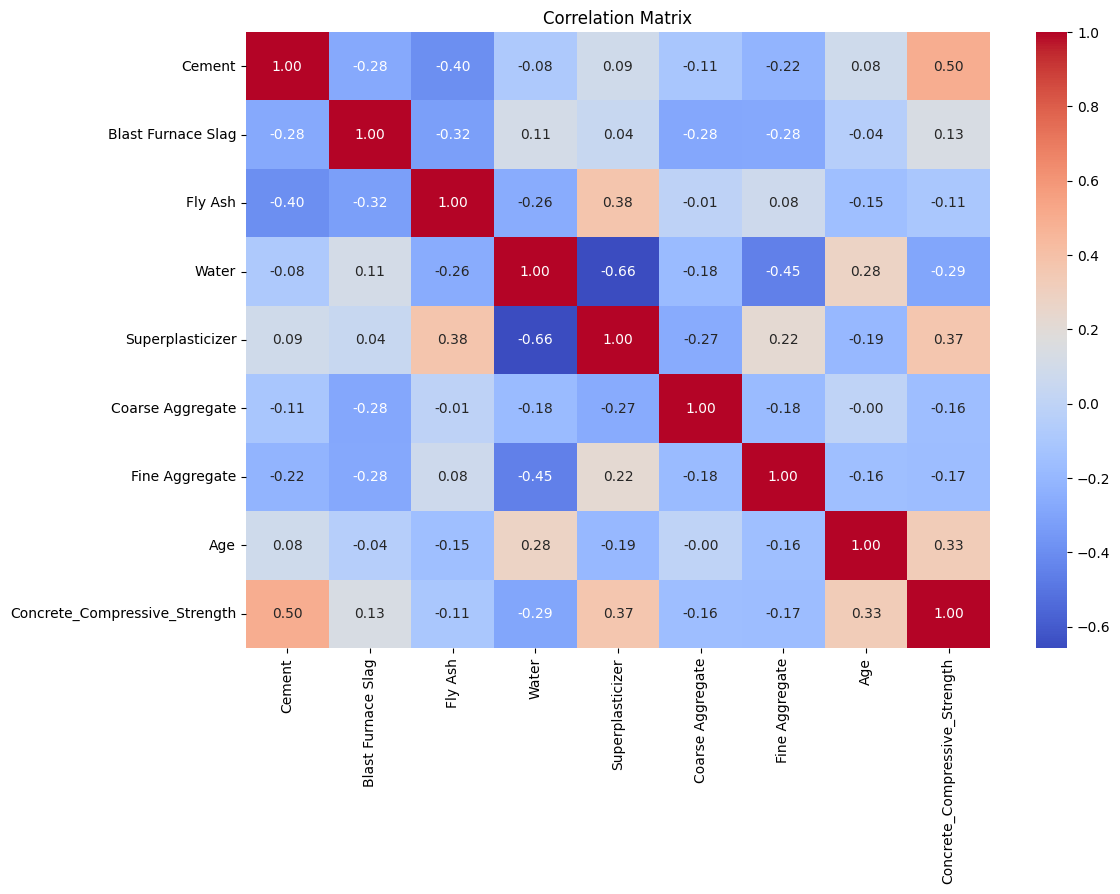

In [ ]:
import seaborn as sns

# Combine features and target for correlation matrix
df_combined = X.copy()
df_combined['Concrete_Compressive_Strength'] = y

# Calculate correlation matrix
correlation_matrix = df_combined.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Cement shows the highest positive correlation with compressive strength (0.50), suggesting it's the most important predictor. Other features, such as Water, show a negative correlation (-0.29), which indicates an inverse relationship.

### 3- Train, Validation, test Split:

In [ ]:
from sklearn.model_selection import train_test_split

# First, split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Next, split the training data further into training and validation sets (75% of 80% = 60% of the total data)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)




### 4- Scaling the data

Since the input features in the Concrete Compressive Strength Dataset have different units and ranges (e.g., Cement ranges from 102 to 540 kg/m³, while Superplasticizer ranges from 0 to 32.2 kg/m³), it is essential to scale the data before applying machine learning models. Many models, such as neural networks, gradient descent-based models, and SVMs, perform better when the data is standardized.


In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the data (MLPs work better when data is scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## III- Training and testing the model:

We will build, train, and evaluate a multi-layer perceptron (MLP) to predict concrete compressive strength using TensorFlow and Keras.


### Multi-Layer Perceptron (MLP) Model for Regression

The model is a simple **Multi-Layer Perceptron (MLP)** for regression, built using TensorFlow/Keras. Below is the structure:

1. **Input Layer**: Accepts input features with shape `X_train.shape[1]`.
2. **Hidden Layers**:
    - **First Layer**: 64 neurons, **ReLU activation**.
    - **Second Layer**: 32 neurons, **ReLU activation**.
    - **Third Layer**: 16 neurons, **ReLU activation**.
3. **Output Layer**: A single neuron with no activation (for continuous output).

#### for epochs=100 and batch_size=64:

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 1558.8060 - mse: 1558.8060 - mae: 35.8390 - val_loss: 1551.6041 - val_mse: 1551.6041 - val_mae: 35.3706
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1527.3182 - mse: 1527.3182 - mae: 35.4051 - val_loss: 1515.0076 - val_mse: 1515.0076 - val_mae: 34.8669
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1485.0933 - mse: 1485.0933 - mae: 34.8248 - val_loss: 1462.6079 - val_mse: 1462.6079 - val_mae: 34.1331
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1426.7438 - mse: 1426.7438 - mae: 33.9917 - val_loss: 1390.4156 - val_mse: 1390.4156 - val_mae: 33.1017
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 1344.7225 - mse: 1344.7225 - mae: 32.8374 - val_loss: 1292.7570 - val_mse: 1292.7570 - val_mae: 31.6613
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 1236.3867 - mse: 1236.3867 - mae: 31.2202

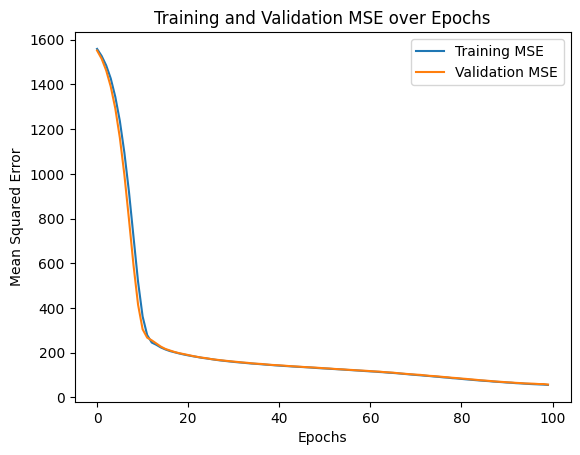

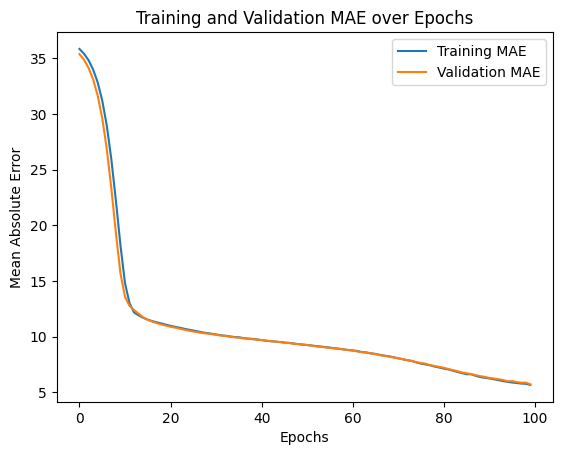

In [ ]:
import tensorflow as tf

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



# Define the MLP model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model and include 'mae' and 'mse' as metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Train the model with validation data
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100,  # Set the number of epochs
                    batch_size=64,  # You can adjust the batch size
                    verbose=1)


# Plot the training and validation MSE and MAE over epochs
import matplotlib.pyplot as plt

# Plot MSE
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE over Epochs')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE over Epochs')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test data
y_test_pred = model.predict(X_test_scaled)

# Calculate additional metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the metrics
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R² (R-squared): {test_r2}')


7/7 [==============================] - 0s 2ms/step
Test MSE: 65.05464538600344
Test MAE: 6.308740569735036
Test RMSE: 8.06564599929872
Test R² (R-squared): 0.7475340366363525


### - Changing the epochs and batch size

#### for epochs=200 and batch_size=128:

Epoch 1/200
5/5 [==============================] - 0s 24ms/step - loss: 54.8834 - mse: 54.8834 - mae: 5.6247 - val_loss: 56.7548 - val_mse: 56.7548 - val_mae: 5.7040
Epoch 2/200
5/5 [==============================] - 0s 12ms/step - loss: 54.3096 - mse: 54.3096 - mae: 5.6124 - val_loss: 56.4839 - val_mse: 56.4839 - val_mae: 5.7029
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 53.8362 - mse: 53.8362 - mae: 5.5942 - val_loss: 56.3597 - val_mse: 56.3597 - val_mae: 5.7054
Epoch 4/200
5/5 [==============================] - 0s 12ms/step - loss: 53.3991 - mse: 53.3991 - mae: 5.5643 - val_loss: 56.0799 - val_mse: 56.0799 - val_mae: 5.6775
Epoch 5/200
5/5 [==============================] - 0s 12ms/step - loss: 52.9123 - mse: 52.9123 - mae: 5.5326 - val_loss: 55.7382 - val_mse: 55.7382 - val_mae: 5.6437
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 52.5039 - mse: 52.5039 - mae: 5.5118 - val_loss: 55.2479 - val_mse: 55.2479 - val_mae: 5.6085
Epoc

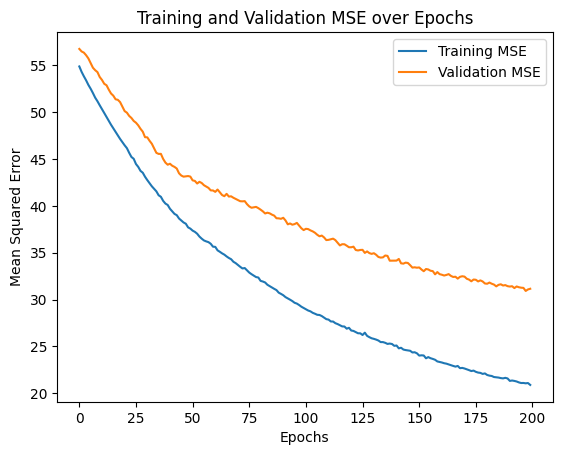

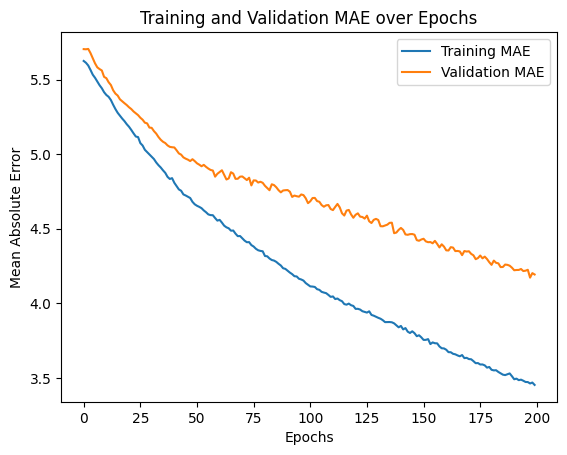

In [ ]:

# Train the model with validation data
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=200,  # Set the number of epochs
                    batch_size=128,  # You can adjust the batch size
                    verbose=1)



# Plot the training and validation MSE and MAE over epochs
import matplotlib.pyplot as plt

# Plot MSE
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE over Epochs')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE over Epochs')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test data
y_test_pred = model.predict(X_test_scaled)

# Calculate additional metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the metrics
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R² (R-squared): {test_r2}')

7/7 [==============================] - 0s 2ms/step
Test MSE: 37.38703359099078
Test MAE: 4.467560760349903
Test RMSE: 6.11449373137227
Test R² (R-squared): 0.8549072742462158


#### for epochs=100 and batch_size=len(X_train) (Batch (Full-Batch) Gradient Descent):

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1538.6611 - mse: 1538.6611 - mae: 35.5262 - val_loss: 1542.2408 - val_mse: 1542.2408 - val_mae: 35.1952
Epoch 2/100
1/1 [==============================] - 0s 45ms/step - loss: 1529.5779 - mse: 1529.5779 - mae: 35.4008 - val_loss: 1532.1681 - val_mse: 1532.1681 - val_mae: 35.0574
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 1519.4362 - mse: 1519.4362 - mae: 35.2609 - val_loss: 1520.8007 - val_mse: 1520.8007 - val_mae: 34.9026
Epoch 4/100
1/1 [==============================] - 0s 44ms/step - loss: 1508.0857 - mse: 1508.0857 - mae: 35.1050 - val_loss: 1508.3308 - val_mse: 1508.3308 - val_mae: 34.7325
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 1495.7139 - mse: 1495.7139 - mae: 34.9343 - val_loss: 1494.9944 - val_mse: 1494.9944 - val_mae: 34.5500
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 1482.5895 - mse: 1482.5895 - mae: 34.7521 - val_lo

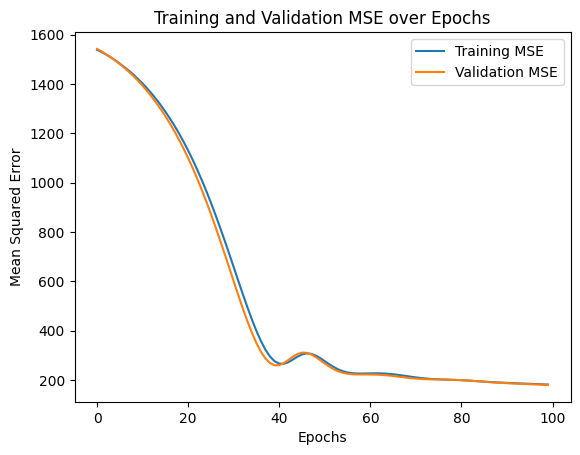

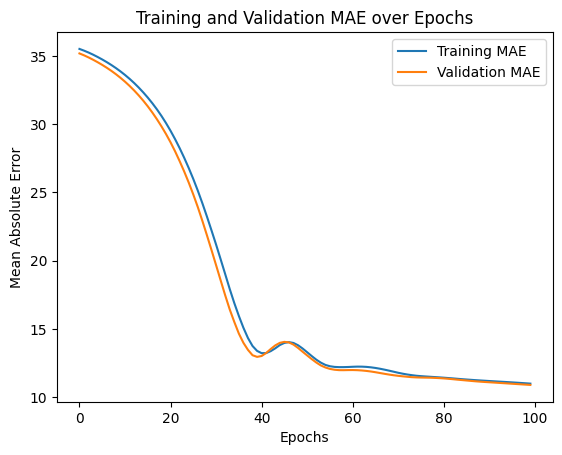

In [ ]:
# Define the MLP model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model and include 'mae' and 'mse' as metrics
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Train the model with validation data
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100,  # Set the number of epochs
                    batch_size=len(X_train_scaled),  # You can adjust the batch size
                    verbose=1)


# Plot the training and validation MSE and MAE over epochs
import matplotlib.pyplot as plt

# Plot MSE
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE over Epochs')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE over Epochs')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test data
y_test_pred = model.predict(X_test_scaled)

# Calculate additional metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the metrics
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R² (R-squared): {test_r2}')


7/7 [==============================] - 0s 1ms/step
Test MSE: 167.75589893202778
Test MAE: 10.703844757450437
Test RMSE: 12.95206157073181
Test R² (R-squared): 0.34896790981292725


#### for epochs=100 and batch_size=1(Stochastic Gradient Descent (SGD)):

Epoch 1/100
618/618 [==============================] - 2s 2ms/step - loss: 184.0986 - mse: 184.0986 - mae: 10.8464 - val_loss: 151.0249 - val_mse: 151.0249 - val_mae: 9.9955
Epoch 2/100
618/618 [==============================] - 1s 2ms/step - loss: 128.8994 - mse: 128.8994 - mae: 9.0021 - val_loss: 126.6919 - val_mse: 126.6919 - val_mae: 8.5118
Epoch 3/100
618/618 [==============================] - 1s 2ms/step - loss: 95.6598 - mse: 95.6598 - mae: 7.6551 - val_loss: 79.4387 - val_mse: 79.4387 - val_mae: 6.8141
Epoch 4/100
618/618 [==============================] - 1s 2ms/step - loss: 70.7006 - mse: 70.7006 - mae: 6.5546 - val_loss: 62.0431 - val_mse: 62.0431 - val_mae: 5.9421
Epoch 5/100
618/618 [==============================] - 1s 2ms/step - loss: 60.0387 - mse: 60.0387 - mae: 5.9076 - val_loss: 49.9232 - val_mse: 49.9232 - val_mae: 5.2474
Epoch 6/100
618/618 [==============================] - 1s 2ms/step - loss: 51.0025 - mse: 51.0025 - mae: 5.4878 - val_loss: 46.0622 - val_mse: 46.

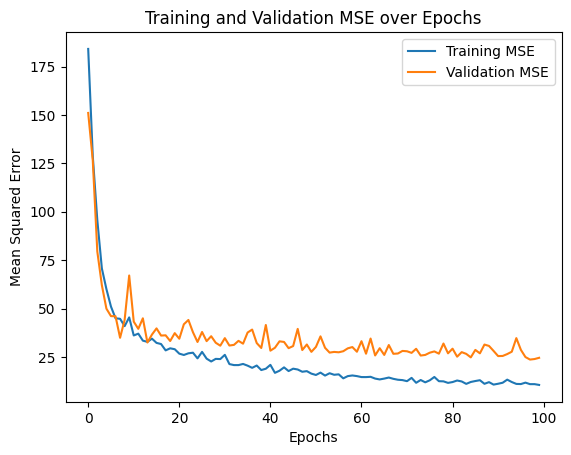

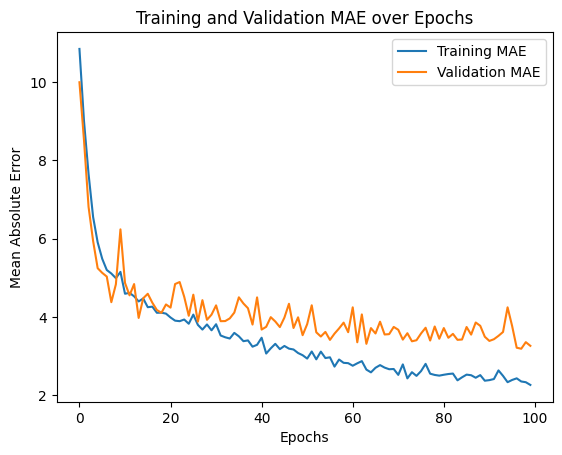

In [ ]:
# Train the model with validation data
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=100,  # Set the number of epochs
                    batch_size=1,  # You can adjust the batch size
                    verbose=1)



# Plot the training and validation MSE and MAE over epochs
import matplotlib.pyplot as plt

# Plot MSE
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE over Epochs')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE over Epochs')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test data
y_test_pred = model.predict(X_test_scaled)

# Calculate additional metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Print the metrics
print(f'Test MSE: {test_mse}')
print(f'Test MAE: {test_mae}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R² (R-squared): {test_r2}')

7/7 [==============================] - 0s 1ms/step
Test MSE: 26.121478092102905
Test MAE: 3.5675469699415183
Test RMSE: 5.110917539160939
Test R² (R-squared): 0.898626983165741


## IV-  Final Comparison and Analysis

Now that we have the performance metrics for each model, let's compare and analyze them:

| **Model**                                 | **Epochs** | **Batch Size**        | **Test MSE** | **Test MAE** | **Test RMSE** | **Test R²**  |
|-------------------------------------------|------------|-----------------------|--------------|--------------|---------------|--------------|
| Model 1                                   | 100        | 64                    | 65.05        | 6.31         | 8.07          | 0.75         |
| Model 2                                   | 200        | 128                   | 37.39        | 4.47         | 6.11          | 0.85         |
| Model 3 (Full-Batch Gradient Descent)     | 100        | len(X_train) (full-batch) | 167.76       | 10.70        | 12.95         | 0.35         |
| Model 4 (Stochastic Gradient Descent, SGD)| 100        | 1 (SGD)               | **26.12**    | **3.57**     | **5.11**      | **0.8986**     |

### Key Observations:

1. **Model 1 (epochs=100, batch_size=64)**:
   - This was the first model with a batch size of 64 and 100 epochs.
   - Performance was decent but with higher errors compared to later models. Test MSE was 65.05, and the R² score was 0.75.
   - The model showed some overfitting, with the validation error slightly higher than the training error.

2. **Model 2 (epochs=200, batch_size=128)**:
   - With increased epochs (200) and a larger batch size (128), this model showed improved MSE and R² scores.
   - Test MSE dropped to 37.39, and the R² score improved to 0.85. The curves were smoother, indicating stable training and generalization.

3. **Model 3 (epochs=100, full-batch gradient descent)**:
   - Full-batch gradient descent (batch_size = len(X_train)) performed the worst, with a significantly higher test MSE of 167.76 and a much lower R² of 0.35.
   - Full-batch training may lead to overfitting as the entire dataset is processed before each update.
   - This model struggled to generalize well.

4. **Model 4 (epochs=100, batch_size=1, SGD)**:
   - Stochastic gradient descent (SGD) with batch size 1 achieved the **best performance**, with the lowest test MSE (26.12) and the highest R² score (0.90).
   - While the training and validation curves showed some fluctuation (expected with SGD), this model captured the data patterns most effectively.


### Conclusion:

- **Best Model**: The model using **stochastic gradient descent (SGD)** with batch size 1 and 100 epochs achieved the best performance, with the lowest MSE and RMSE, and the highest R² score. It effectively captured the patterns in the data.
- **Poor Performance with Full-Batch GD**: The full-batch gradient descent model performed the worst, suggesting that slower weight updates and potential overfitting negatively impacted generalization.
- **Epochs and Batch Size Trade-off**: Increasing the epochs (200 in Model 2) improved performance compared to Model 1, but increasing batch size had mixed effects. A smaller batch size (SGD) led to the most significant improvements.

### Mathematical Formulas:

- **Mean Squared Error (MSE)**:
  $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

- **Mean Absolute Error (MAE)**:
  $$ MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i | $$

- **Root Mean Squared Error (RMSE)**:
  $$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

- **R-squared (R²)**:
  $$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$


**R²** tells us how much of the target variable's variance is explained by the model, while **RMSE** measures the average magnitude of the prediction error.

###Concrete compressive strength  
count                    1030.000000  
mean                       35.817961  
std                        16.705742  
min                         2.330000  
25%                        23.710000  
50%                        34.445000  
75%                        46.135000  
max                        82.600000

### Evaluation of the 4th Model (RMSE = 5.11, R² = 0.90)

- **Relative to the Mean**: The mean compressive strength is **35.82 MPa**, and the RMSE of **5.11 MPa** is small, indicating that the model's average error is reasonable compared to typical values.
  
- **Relative to the Range**: With compressive strength values ranging from **2.33 MPa to 82.60 MPa**, the RMSE of **5.11 MPa** represents a small portion of this range, suggesting good prediction accuracy.

- **Relative to the Standard Deviation**: The standard deviation is **16.71 MPa**, and the RMSE is significantly smaller, meaning the model's error is well below the natural variability in the data.

- **R² = 0.90**: This means that 90% of the variance in concrete compressive strength is explained by the model, which indicates strong predictive performance.

### Conclusion:
- The model's **RMSE of 5.11** and **R² of 0.90** suggest it performs very well, with small errors relative to the dataset's variability and a high proportion of explained variance.



To understand how impressive the performance of our neural network models is, we will compare the results with a simple linear regression model. Linear regression serves as a baseline model here . By evaluating its performance using the same metrics (MSE, MAE, and R²), we can quantify the improvements made by the neural network and assess whether the added complexity is justified.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for certain models, though Linear Regression doesn't strictly need scaling)
scaler = StandardScaler()
X_train_scaled_lr = scaler.fit_transform(X_train_lr)
X_test_scaled_lr = scaler.transform(X_test_lr)

# Define the Linear Regression model
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(X_train_scaled_lr, y_train_lr)

# Make predictions on the test set
Y_pred_lr = model_lr.predict(X_test_scaled_lr)

# Evaluate the model
mse_lr = mean_squared_error(y_test_lr, Y_pred_lr)
mae_lr = mean_absolute_error(y_test_lr, Y_pred_lr)
r2_lr = r2_score(y_test_lr, Y_pred_lr)

# Print the evaluation results
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - Mean Absolute Error: {mae_lr}")
print(f"Linear Regression - R-squared: {r2_lr}")


Linear Regression - Mean Squared Error: 95.97094009110683
Linear Regression - Mean Absolute Error: 7.745559243921434
Linear Regression - R-squared: 0.627553179231485


After comparing the neural network models with a linear regression baseline, it is evident that the added complexity of the neural networks results in significantly better performance